In [2]:
import os
os.environ["LD_LIBRARY_PATH"] = os.environ.get("LD_LIBRARY_PATH", "") + ":/home/juanhevia/.mujoco/mujoco210/bin" + ":/usr/lib/nvidia"

import gymnasium as gym

env = gym.make('FrankaKitchen-v1', tasks_to_complete=['microwave', 'kettle'])

/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment CartPole-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment CartPole-v1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MountainCar-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MountainCarContinuous-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec

Import error. Trying to rebuild mujoco_py.
running build_ext
building 'mujoco_py.cymj' extension
gcc -pthread -B /home/juanhevia/miniconda3/envs/aidil/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/mujoco_py -I/home/juanhevia/.mujoco/mujoco210/include -I/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/numpy/core/include -I/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/mujoco_py/vendor/egl -I/home/juanhevia/miniconda3/envs/aidil/include/python3.8 -c /home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/mujoco_py/cymj.c -o /home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/mujoco_py/generated/_pyxbld_2.1.2.14_38_linuxgpuextensionbuilder/temp.linux-x86_64-cpython-38/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/mujoco_py/cymj.o -fopenmp -w


In [2]:
observation, completion = env.reset()

In [3]:
observation

{'observation': array([ 1.49274498e-01, -1.76946316e+00,  1.84327940e+00, -2.47733351e+00,
         2.60224439e-01,  7.11698381e-01,  1.59499952e+00,  4.84265507e-02,
         3.69488059e-02,  5.42175843e-04,  5.13482510e-04, -3.76945343e-04,
        -5.87768717e-04, -5.08609614e-04,  4.32380332e-04,  5.72537748e-05,
         6.97228118e-04, -1.65718624e-04, -2.51261747e-04, -5.42272900e-05,
         2.96661672e-05, -4.49762890e-05, -3.66756375e-06, -4.22458129e-05,
         6.26396622e-05,  4.03157271e-05,  4.62633515e-04, -2.26920561e-04,
        -4.65239715e-04, -6.44355977e-03, -1.81221900e-03,  1.09829891e-03,
        -2.69424868e-01,  3.50382993e-01,  1.61944857e+00,  9.99969379e-01,
         4.05380702e-03, -6.56755675e-03, -2.53110845e-04,  5.82423659e-07,
        -5.01487449e-07, -1.77493039e-06,  1.67937126e-06,  6.83592490e-07,
        -2.44823496e-06, -1.74056880e-06,  8.16617979e-07,  1.21922707e-06,
        -1.95524038e-06,  2.01053145e-06, -4.88596320e-06,  1.47671743e-0

In [4]:
completion

{'tasks_to_complete': ['kettle', 'microwave'],
 'episode_task_completions': [],
 'step_task_completions': []}

# Can I pass it to a `Monitor`?

In [13]:
from stable_baselines3.common.monitor import Monitor

In [14]:
mon = Monitor(env, "test_gymnasium")

In [21]:
res = env.step(env.action_space.sample())

In [22]:
res = mon.step(mon.action_space.sample())

ValueError: too many values to unpack (expected 4)

In [24]:
res[0]

{'observation': array([ 4.45437995e-02, -1.76426911e+00,  1.85665632e+00, -2.45411465e+00,
         3.60638360e-01,  7.67122226e-01,  1.60421277e+00,  3.05994698e-02,
         3.93501090e-02, -5.36792331e-01,  4.69529635e-03, -1.43176285e-01,
         3.70991335e-02,  8.78811031e-02,  1.69983173e-02,  3.00017565e-01,
        -1.36680906e-01,  9.17656045e-03, -1.88976142e-04,  4.63681424e-07,
         2.64083299e-05,  2.22646399e-07,  2.12701786e-05,  4.57921758e-07,
         2.97629379e-05,  5.38054564e-07,  4.21610400e-05,  7.71993246e-06,
        -1.75263235e-05, -6.44036316e-03, -7.03522983e-05, -2.22885733e-06,
        -2.69436532e-01,  3.50369098e-01,  1.61935201e+00,  1.00000155e+00,
         3.68772369e-06,  2.72704062e-05, -3.25689853e-04,  2.82100424e-04,
         1.97393703e-06, -7.09550177e-06,  1.76433960e-06,  2.98250412e-05,
        -2.23264694e-06, -4.99880263e-05, -1.46262443e-06, -2.66915080e-04,
        -1.69760271e-05,  2.60583887e-04,  1.00308323e-06,  6.43211523e-0

In [25]:
res[1]

0.0

In [26]:
res[2]

False

In [27]:
res[3]

False

In [28]:
res[4]

{'tasks_to_complete': ['kettle', 'microwave'],
 'step_task_completions': [],
 'episode_task_completions': []}

# How do I generate expert trajectories?

In [ ]:
import minari

Exception: 
Missing path to your environment variable. 
Current values LD_LIBRARY_PATH=
Please add following line to .bashrc:
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/juanhevia/.mujoco/mujoco210/bin

## Download

In [ ]:
minari.download_dataset("kitchen-complete-v1")



 * Downloading data file 'kitchen-complete-v1/_docs/_imgs/kitchen-complete-v1.gif' ...



100%|██████████| 19.9M/19.9M [00:00<00:00, 43.5MB/s]



 * Downloading data file 'kitchen-complete-v1/data/main_data.hdf5' ...



100%|██████████| 4.10M/4.10M [00:00<00:00, 73.0MB/s]



 * Downloading data file 'kitchen-complete-v1/data/metadata.json' ...



100%|██████████| 1.02k/1.02k [00:00<00:00, 92.9kB/s]


Dataset kitchen-complete-v1 downloaded to /home/juanhevia/.minari/datasets/kitchen-complete-v1


In [71]:
minari.download_dataset("kitchen-mixed-v1")



 * Downloading data file 'kitchen-mixed-v1/_docs/_imgs/kitchen-mixed-v1.gif' ...



100%|██████████| 19.9M/19.9M [00:00<00:00, 35.0MB/s]



 * Downloading data file 'kitchen-mixed-v1/data/main_data.hdf5' ...



100%|██████████| 150M/150M [00:01<00:00, 96.2MB/s] 



 * Downloading data file 'kitchen-mixed-v1/data/metadata.json' ...



100%|██████████| 1.05k/1.05k [00:00<00:00, 9.81kB/s]


Dataset kitchen-mixed-v1 downloaded to /home/juanhevia/.minari/datasets/kitchen-mixed-v1


## Check data

In [ ]:
import json 
import pickle
import numpy as np 
import pandas as pd 

In [31]:
DEMO_PATH = "kitchen_franka_demos/kitchen-complete-v1/"

In [34]:
os.listdir(os.path.join(DEMO_PATH, 'data'))

['main_data.hdf5', 'metadata.json']

In [35]:
with open(os.path.join(DEMO_PATH, 'data', 'metadata.json'), 'r') as f:
    metadata = json.load(f)

metadata

{'env_spec': '{"id": "FrankaKitchen-v1", "entry_point": "gymnasium_robotics.envs.franka_kitchen:KitchenEnv", "reward_threshold": null, "nondeterministic": false, "max_episode_steps": 280, "order_enforce": true, "disable_env_checker": false, "kwargs": {"remove_task_when_completed": false, "terminate_on_tasks_completed": false, "tasks_to_complete": ["microwave", "kettle", "light switch", "slide cabinet"]}, "additional_wrappers": [], "vector_entry_point": null}',
 'dataset_id': 'kitchen/complete-v1',
 'algorithm_name': 'None',
 'author': ['Rodrigo de Lazcano'],
 'author_email': ['rperezvicente@farama.org'],
 'code_permalink': 'https://github.com/rodrigodelazcano/d4rl-minari-dataset-generation',
 'ref_max_score': 4.0,
 'ref_min_score': 0.0,
 'num_episodes_average_score': 100,
 'total_episodes': 19,
 'total_steps': 4209,
 'minari_version': '0.4.3',
 'data_format': 'hdf5',
 'dataset_size': 4.3,
 'description': 'The complete dataset includes demonstrations of all 4 target subtasks being compl

In [36]:
import h5py

In [54]:
with h5py.File(os.path.join(DEMO_PATH, 'data', 'main_data.hdf5'), 'r') as f:
    print(list(f.keys()))
    print(f['episode_0']['observations']['observation'])
    # print(f['observations'].shape)
    # print(f['actions'].shape)
    # print(f['completions'].shape)

['episode_0', 'episode_1', 'episode_10', 'episode_11', 'episode_12', 'episode_13', 'episode_14', 'episode_15', 'episode_16', 'episode_17', 'episode_18', 'episode_2', 'episode_3', 'episode_4', 'episode_5', 'episode_6', 'episode_7', 'episode_8', 'episode_9']
[ 1.48752727e-01 -1.76937809e+00  1.84334368e+00 -2.47748886e+00
  2.59603838e-01  7.13157294e-01  1.59600063e+00  4.74798993e-02
  3.77746010e-02  7.79785386e-04  2.59409105e-05 -5.10070798e-04
  6.48483192e-04 -5.72474073e-04  4.82934104e-04  2.59880409e-04
  8.54814517e-04 -5.36183623e-04 -2.36367337e-04 -5.17135234e-05
  2.99455001e-05 -4.52870333e-05 -3.90952708e-06 -4.22216032e-05
  6.26487165e-05  4.02559183e-05  4.62716506e-04 -2.25765198e-04
 -4.63408367e-04 -6.44066429e-03 -1.72877037e-03  1.11656587e-03
 -2.69425626e-01  3.50385086e-01  1.61944798e+00  9.99969049e-01
  4.06854340e-03 -6.54352526e-03 -2.86677382e-04  1.35210420e-07
 -2.14256597e-06  4.16192051e-07 -1.31046800e-06  1.32481823e-06
 -1.63184182e-06 -9.36288719

## Loading from `minari`

In [7]:
dataset = minari.load_dataset("kitchen-complete-v1")

In [8]:
dataset_mixed = minari.load_dataset("kitchen-mixed-v1")

In [9]:
counter = 0
for ep in dataset.iterate_episodes():
    print(len(ep.actions))
    counter += len(ep.actions)

print(counter)

212
208
222
236
223
223
233
224
236
211
219
221
219
223
236
210
214
216
223
4209


In [10]:
len(dataset_mixed)

621

In [11]:
counter = 0
for ep in dataset_mixed.iterate_episodes():
    # print(len(ep.actions))
    counter += len(ep.actions)

print(counter)

156560


In [12]:
import pickle 
# load a sample pickle file to get an idea of the data structure
with open(os.path.join('../', 'idil_train', 'experts', 'CleanupSingle-v0_100.pkl'), 'rb') as f:
    example_expert = pickle.load(f)

example_expert.keys()

dict_keys(['states', 'next_states', 'actions', 'latents', 'rewards', 'dones', 'lengths'])

In [13]:
len(example_expert['states']) # 100 trajectories

100

From [the documentation](https://robotics.farama.org/envs/franka_kitchen/franka_kitchen/), there are 3 relevant keys:
- `observation`: holds environment observation (like kettle's position or angular velocity of the cabinet door)
- `achieved goal`: this key represents the final goal to be achieved. The value is another Dict space with keys the tasks to be completed in the episode and values the joint goal configuration of each joint in the task as specified in the `Goal` section.
- `desired goal`: this key represents the desired state of the tasks. The value is another Dict space with keys the tasks to be completed in the episode and values the desired joint configuration of each joint in the task.

# Generatee macro-goals labels

## Mixed Dataset

In [66]:
# parse the mixed dataset into a proper object
num_terminated = 0
for ep in dataset_mixed.iterate_episodes():
    num_terminated += 1 if np.sum(ep.terminations) > 0 else 0
    sample_episode = ep
    if any(ep.terminations): # take only a terminated episode as a sample
        print("Found a terminated episode")
        break

    # else take the last one
    
print(f"{num_terminated} terminated episodes found")

0 terminated episodes found


In [67]:
print(sample_episode.observations["achieved_goal"].keys())
print(sample_episode.observations["desired_goal"].keys())

dict_keys(['bottom burner', 'kettle', 'light switch', 'microwave'])
dict_keys(['bottom burner', 'kettle', 'light switch', 'microwave'])


In [68]:
sample_episode.observations['observation'].shape

(277, 59)

In [69]:
sample_episode.observations['achieved_goal']['bottom burner'].shape
sample_episode.observations['desired_goal']['bottom burner'].shape

(277, 2)

In [71]:
# can we use the vector distance between the achieved and desired goal as a termination mark?
import numpy as np
import matplotlib.pyplot as plt 

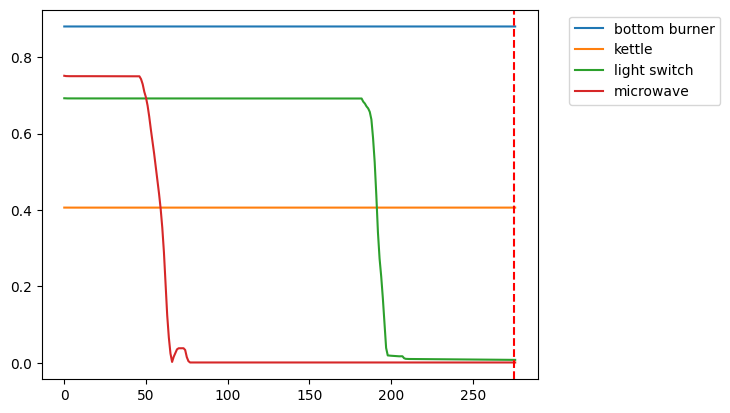

In [72]:
# try for all desired goals
desired_goals = list(sample_episode.observations['desired_goal'].keys())

fig, ax = plt.subplots(1,1,)

for dgoal in desired_goals:
    l2_goal_dist_sample = np.linalg.norm(sample_episode.observations['achieved_goal'][dgoal] - sample_episode.observations['desired_goal'][dgoal], axis=1)
    ax.plot(l2_goal_dist_sample)

ax.legend(desired_goals, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.axvline(np.where(sample_episode.truncations)[0][0], color='r', linestyle='--')

In [39]:
# confirm with terminations
any(sample_episode.terminations) # it was not terminated
any(sample_episode.truncations) # this episode was truncated

# where was it truncated?
np.sum(sample_episode.truncations) # only one truncation point, as expected
np.argwhere(sample_episode.truncations) # at the idx 375

array([[375]])

Makes sense because the `mixed` dataset contains various subtasks being performed, but **the 4 target subtasks are never completed in sequence together**.


## Complete dataset

In [73]:
# parse the mixed dataset into a proper object
num_terminated = 0
for ep in dataset.iterate_episodes():
    num_terminated += 1 if np.sum(ep.terminations) > 0 else 0
    sample_episode = ep
    if any(ep.terminations): # take only a terminated episode as a sample
        print("Found a terminated episode")
        break

    # else take the last one
    
print(f"{num_terminated} terminated episodes found")

0 terminated episodes found


In [74]:
print(sample_episode.observations["achieved_goal"].keys())
print(sample_episode.observations["desired_goal"].keys())

dict_keys(['kettle', 'light switch', 'microwave', 'slide cabinet'])
dict_keys(['kettle', 'light switch', 'microwave', 'slide cabinet'])


In [75]:
sample_episode.observations['observation'].shape

(224, 59)

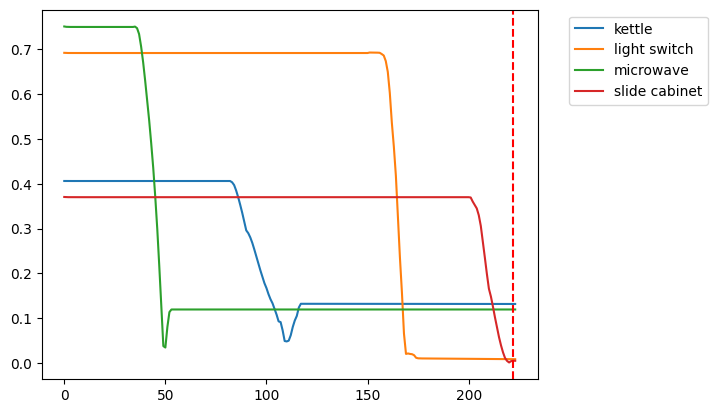

In [77]:
# try for all desired goals
desired_goals = list(sample_episode.observations['desired_goal'].keys())

fig, ax = plt.subplots(1,1,)

for dgoal in desired_goals:
    l2_goal_dist_sample = np.linalg.norm(sample_episode.observations['achieved_goal'][dgoal] - sample_episode.observations['desired_goal'][dgoal], axis=1)
    ax.plot(l2_goal_dist_sample)

ax.legend(desired_goals, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.axvline(np.where(sample_episode.truncations)[0][0], color='r', linestyle='--')

In [78]:
# confirm with terminations
any(sample_episode.terminations) # it was not terminated
any(sample_episode.truncations) # this episode was truncated

# where was it truncated?
np.sum(sample_episode.truncations) # only one truncation point, as expected
np.argwhere(sample_episode.truncations) # at the idx 375

array([[222]])

### Algorithm idea

0. compute the L2 norm between the `achieved_goal` and the `desired_goal` for each timestep.
1. get `np.argmin()` for each separate *l2 norm* trajectory. This gives me the order in which the tasks where executed.
2. use the indices and label (state, action) timesteps so that they map the *currently active* goal.
